# Quality of life Function


> line() to create line

> boxplot(feature) to create boxplot of that feature /vs churn



In this section, I am focusing on creating a quality of life function to help reduce repete coding.

In [ ]:
def line():
  '''
  ฟังชั้นสร้างเส้นกั้นข้อความเพืิ่อความสะดวกต่อการอ่าน
  '''
  print("-" * 50)

In [ ]:
def boxplot(feature):
  '''
  box plots selected data
  '''
  sns.boxplot(data=df, x='Exited', y=feature)
  plt.title(f'{feature} vs Churn')
  plt.show()

# Import (Data , Libralies , etc.)



In this section, I am focusing in importing libralies, data, and setting data frame.

In [ ]:
# Import libralies ทั้งหมดที่ใช้
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Variables DataFrame Original ที่ไม่มีการเปลี่ยนแปลง
df_ori = pd.read_csv('Customer-Churn-Records.csv')

In [ ]:
# Drop unusable column and create a new variable
df = df_ori.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# replace " " with "_"
df.columns = df.columns.str.replace(' ', '_')

# EDA (Exploratory Data Analysis)
> comment is the insight of each table.


This section is one of the most important section in my code base, because before we want to do anything with this data, we need to explore it and understand it.

In [ ]:
df.shape

(10000, 15)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
# Basic describe check
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
# check null and check Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction_Score  10000 non-null  int64  
 13  Card_Type           10000 non-null  object 
 14  Point_Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [ ]:
for col in df.columns:
    '''
    loops for value count of each columns
    '''
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    line()

# This shows, that the given data is clean and good quality data.
# (No null, No obious mistake after value counts each data)

Value counts for column: CreditScore
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64
--------------------------------------------------
Value counts for column: Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Age
Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
--------------------------------------------------
Value counts for column: Tenure
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
------

In [ ]:
# min, max, mean of important column
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
print(df[columns].agg(['min', 'max', 'mean']))


      CreditScore      Age        Balance  EstimatedSalary
min      350.0000  18.0000       0.000000        11.580000
max      850.0000  92.0000  250898.090000    199992.480000
mean     650.5288  38.9218   76485.889288    100090.239881


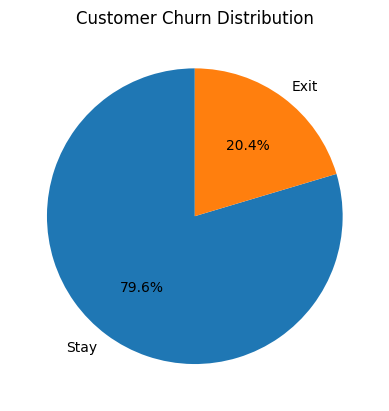

In [ ]:
churn_count = df['Exited'].value_counts()
plt.pie(churn_count, labels=['Stay','Exit'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.show()

# The insight from this pie chart shows that this bank customer retention is Terrible. (20% exit)

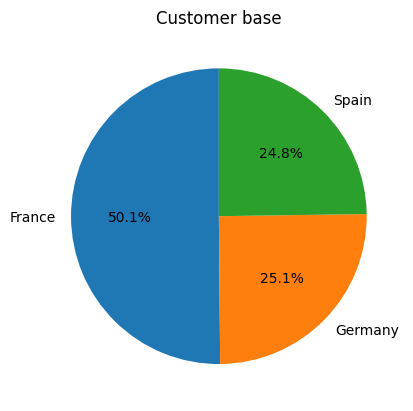

In [ ]:
customer_base = df_ori['Geography'].value_counts()
plt.pie(customer_base, labels=['France','Germany','Spain'], autopct='%1.1f%%', startangle=90)
plt.title('Customer base')
plt.show()

# The insight from this pie chart shows where are this bank customer are from.

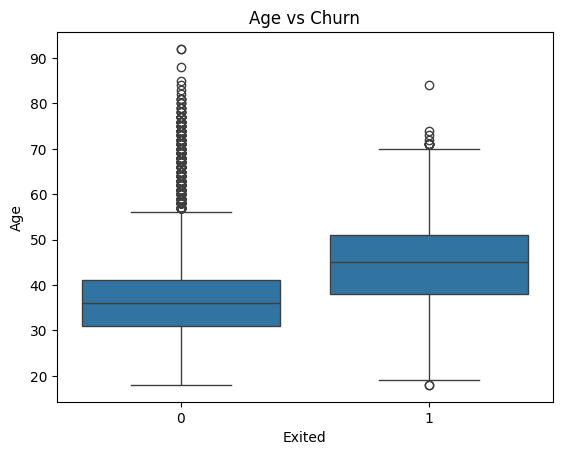

In [ ]:
boxplot('Age')

# Customer who ages under 35 is more likely to exit.

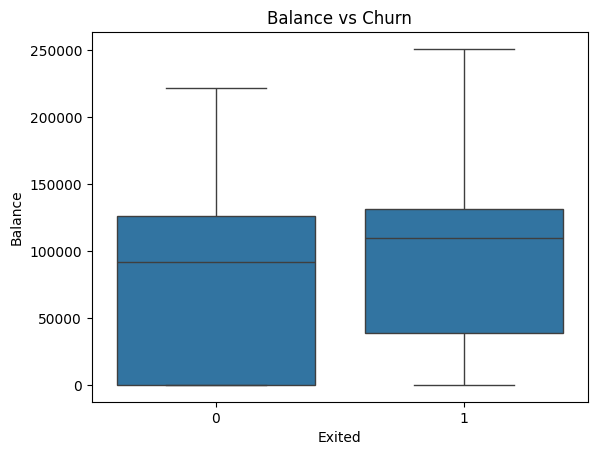

In [ ]:
boxplot('Balance')

# Customer who have high balance is more likely to stay.

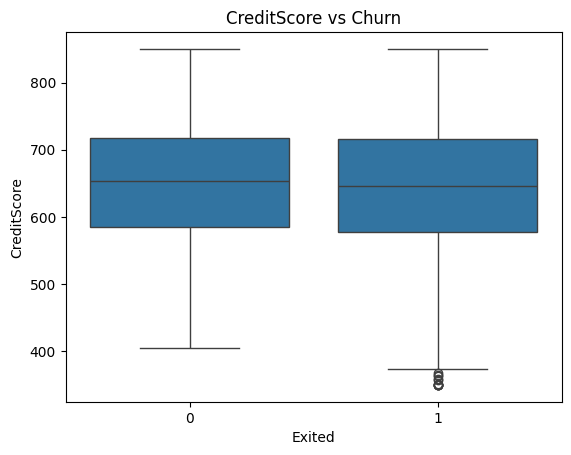

In [ ]:
boxplot('CreditScore')

# From this graph we can see that Credit Score have very low impact..

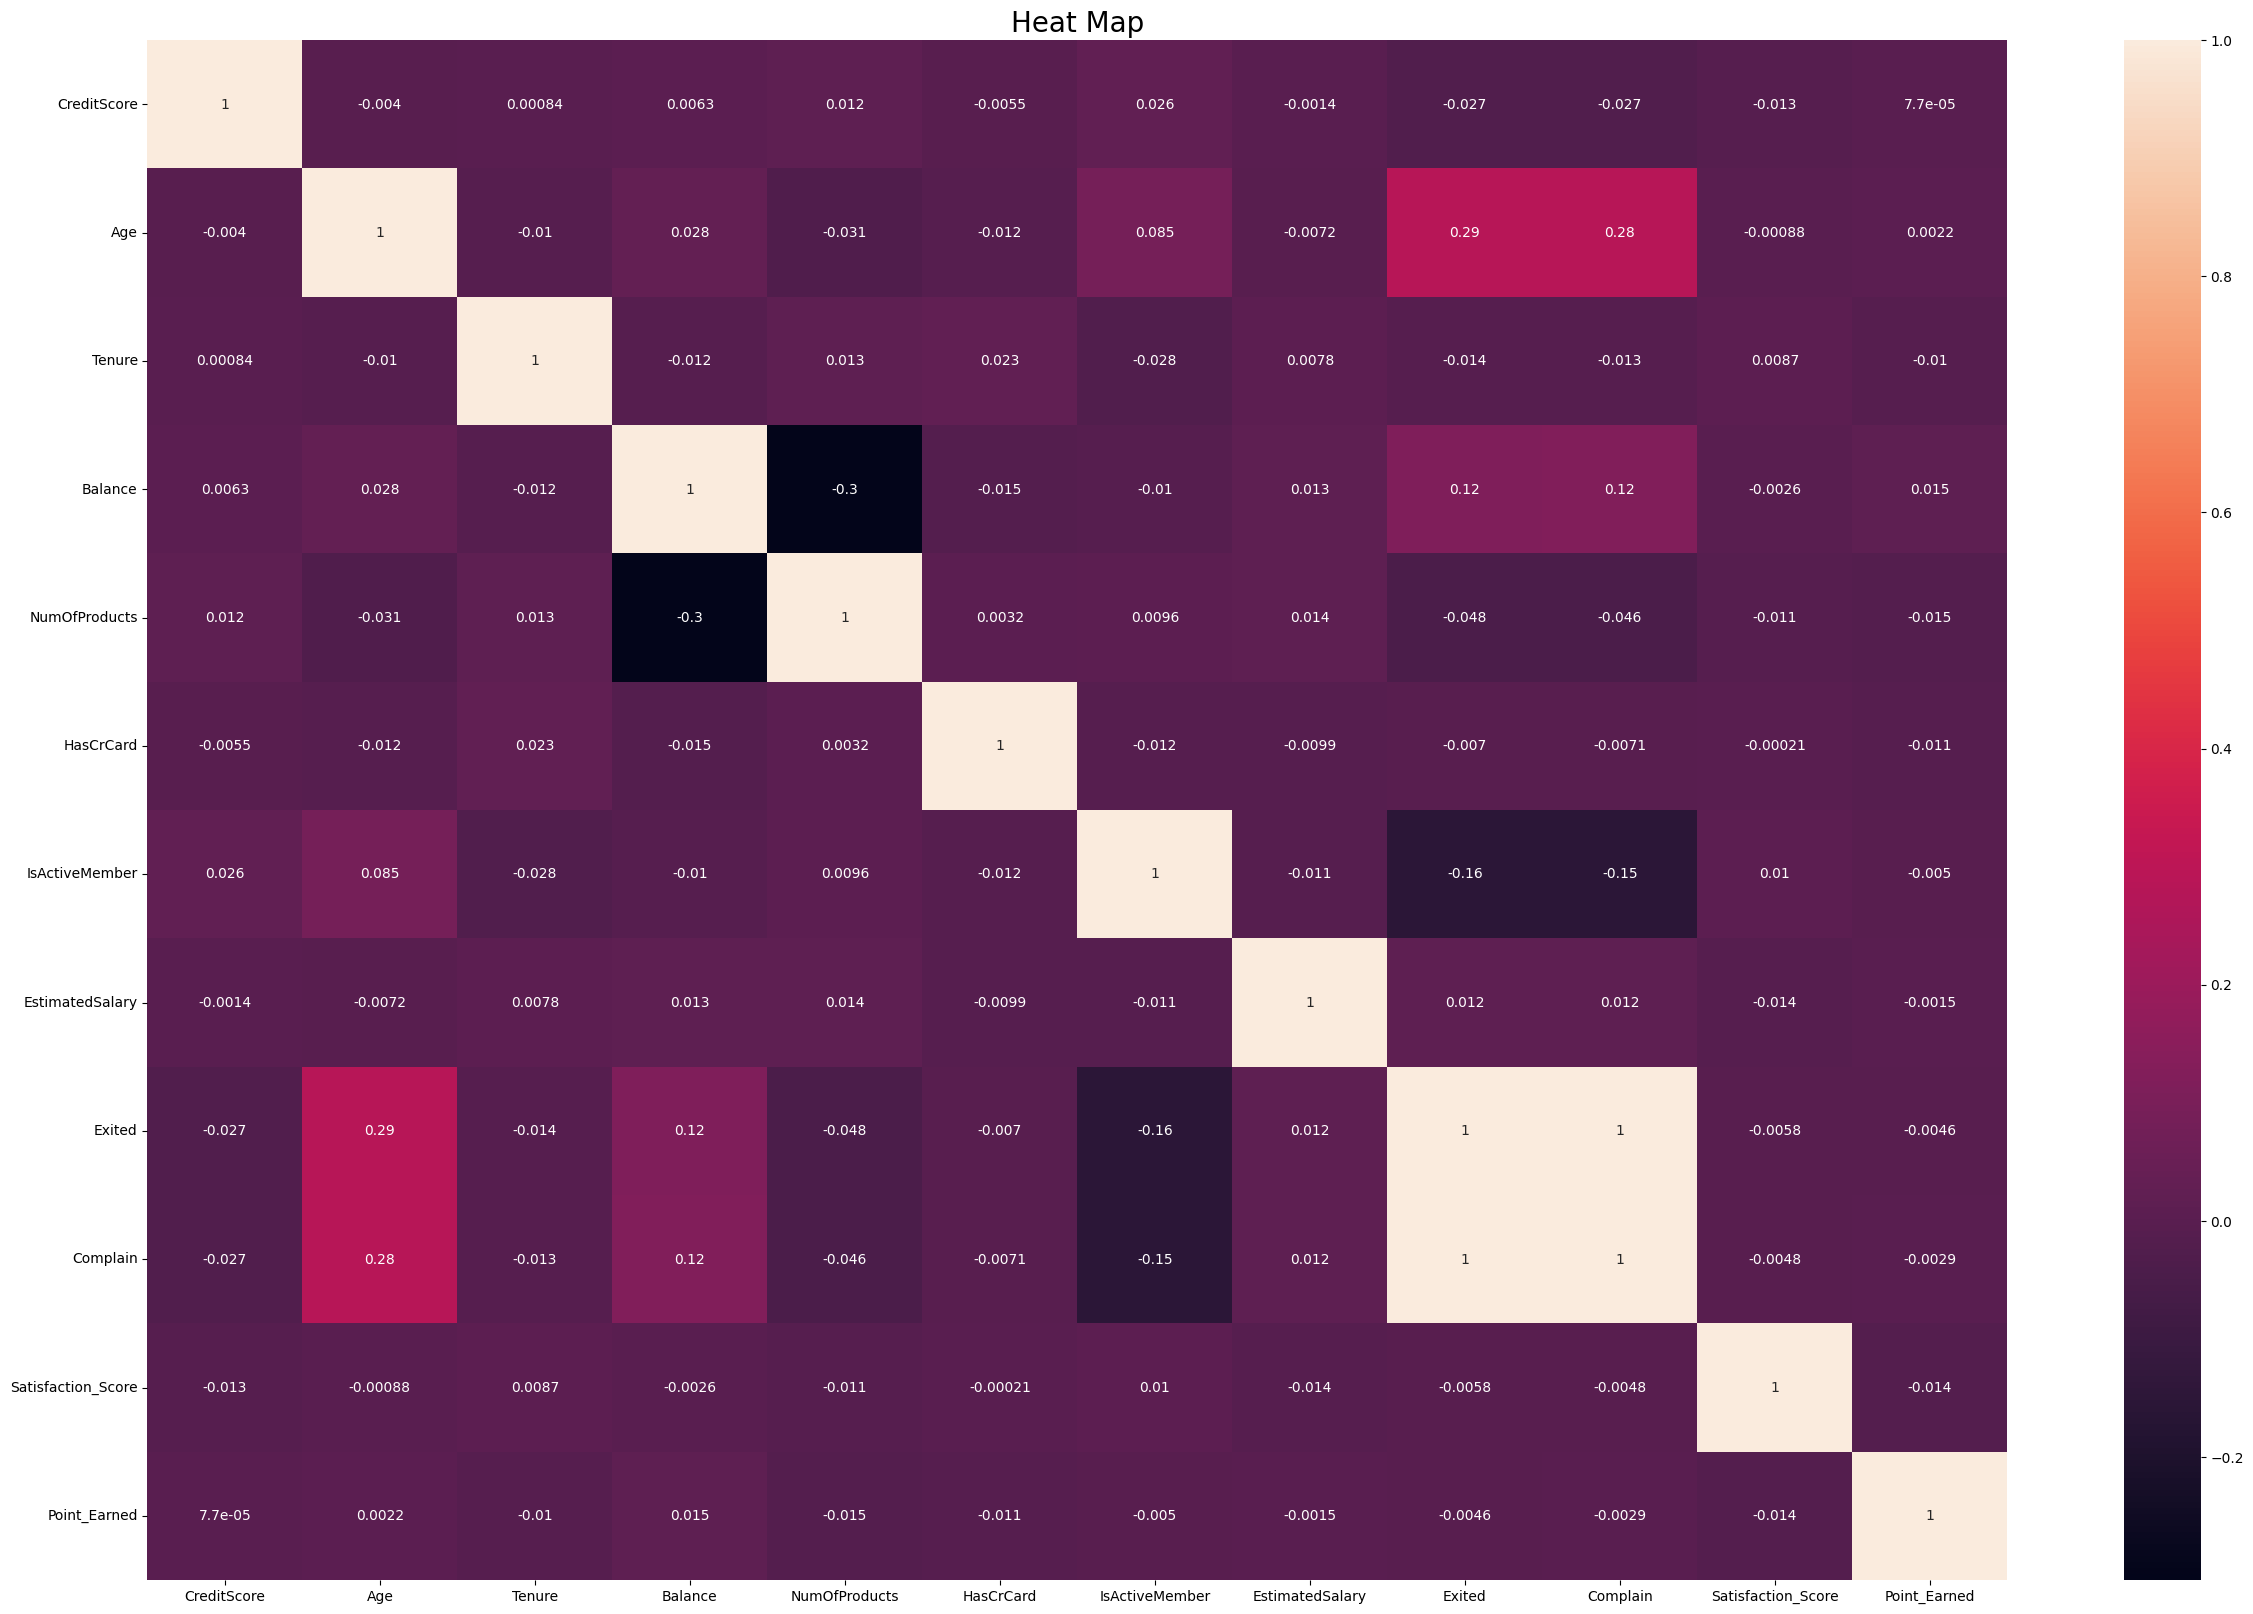

In [ ]:
'''
from https://github.com/Sakolkrit/tutorial-beginner-house-price-prediction/blob/main/code.ipynb
'''
# heatmap to see Correlation

plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True,)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

# as you can see from this heat map, customer that complain is leading to exit.

# Data Preparation & Preprocessing

This section is also important. because before we can do or make ML model we need to prepare our data to be ready to use and make sure that the model can understand.

In [ ]:
le = LabelEncoder()

Encode Columns for the model to be able to understand

LabelEncoder (for binary) and OneHotEncoder (for multi-category)

In [ ]:
# male = 1, female = 0 (Label Endoder)

df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
# Create new columns (Geography_Spain, Geo_Germany, etc) and represent it with 0, 1 (One Hot Encoder)

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [ ]:
# One hot enconder similar to the above
df = pd.get_dummies(df, columns=['Card_Type'], drop_first=True)

In [ ]:
scaler = StandardScaler()

# Select only numeric feature (Not include Target Exited)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Scale Data
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split Data to train and test, By ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model

This section is where our ML is made up. I tried/tested differrent ML model to know the accuracy of each model and choose the one the going to be my final model.

1. This one right here is Logistic Regression. It is the simplest model but it very to understand. However due to it being very easy to understand and not complex enough to be accurate model, I had to skip this one.

In [ ]:
# Create and train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaculate
print("Logistic Regression Results")
line()
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
line()
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
line()
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results
--------------------------------------------------
Accuracy: 0.999
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------

Confusion Matrix:
 [[1606    1]
 [   1  392]]


2. This is Decision tree classifier model. This one is one of the most easiest model i ever known. this is so simple yet so powerful model but compare to other model this one is not enough to beat other model.

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
line()
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
line()
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Results
--------------------------------------------------
Accuracy: 0.9975
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



3. This is Random Forest Classifer model. this one is more complex and i can see a lots of my colleague using it. I also personally choose this model to be my final model. very powerful model.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
line()
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
line()
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results
--------------------------------------------------
Accuracy: 0.999
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



4. This model is more tricky, i think this model is pretty advanced and i don't have that kind of confident to use this model because i also didn't understand this model well.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
line()
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
line()
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Results
--------------------------------------------------
Accuracy: 0.999
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:03:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


This is where i test the model with the test data i kept. (80% train, 20% test)

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

for name, acc in zip(models, accuracies):
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.9990
Decision Tree: 0.9975
Random Forest: 0.9990
XGBoost: 0.9990


Confusing Matrix of the Random Forest

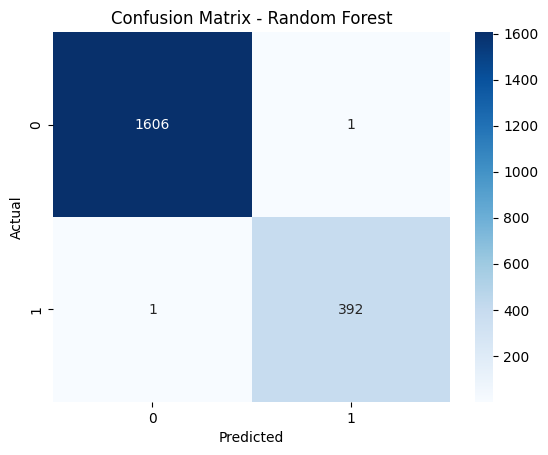

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Here is the Top 10 important features in graph.

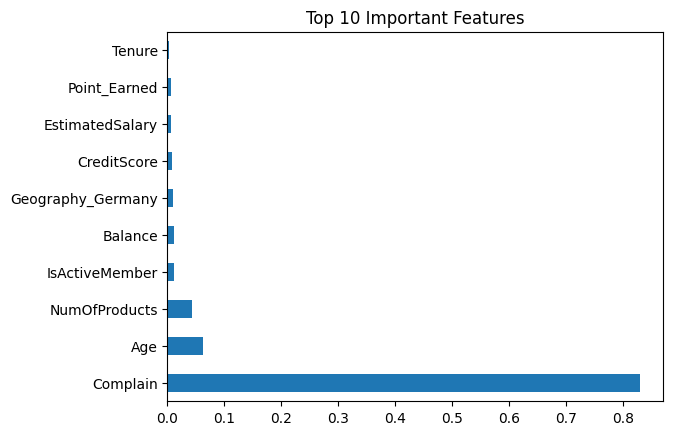

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Application

> Pipeline included

> Basically All of the above but in summarized and completed version.

> Using Random Forest Model.

Application Section จะเอามาแค่สิ่งที่จำเป็นและสำคัญ เหมือนกับการทำโปรเจคขึ้นมาใหม่

In [ ]:
# Import Libralies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
# Load the data from the CSV file
df = pd.read_csv("Customer-Churn-Records.csv")

# Drop columns that are not relevant for the analysis
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, errors='ignore')

# Replace spaces in column names with underscores for easier access
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Print the lists of column names to verify
print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction_Score', 'Point_Earned']
Categorical columns: ['Geography', 'Gender', 'Card_Type']


In [ ]:
# Define preprocessing steps for numerical and categorical features

# Standardize numerical features (remove mean and scale to unit variance)
numeric_transformer = StandardScaler()

# Apply One-Hot Encoding to categorical features
# drop='first' avoids multicollinearity
# handle_unknown='ignore' handles unseen categories in test data
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols), # Apply StandardScaler to numerical columns
        ('cat', categorical_transformer, cat_cols) # Apply OneHotEncoder to categorical columns
    ]
)

In [ ]:
# Define the machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that first preprocesses the data and then applies the model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor), # Apply the preprocessing steps
    ('model', model) # Apply the Random Forest model
])

In [ ]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of data is for testing, 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train the pipeline (preprocessing and model) on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
line()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
line()
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.999
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------

Confusion Matrix:
 [[1606    1]
 [   1  392]]


Top 10 Important Features

<Axes: title={'center': 'Top 10 Important Features'}>

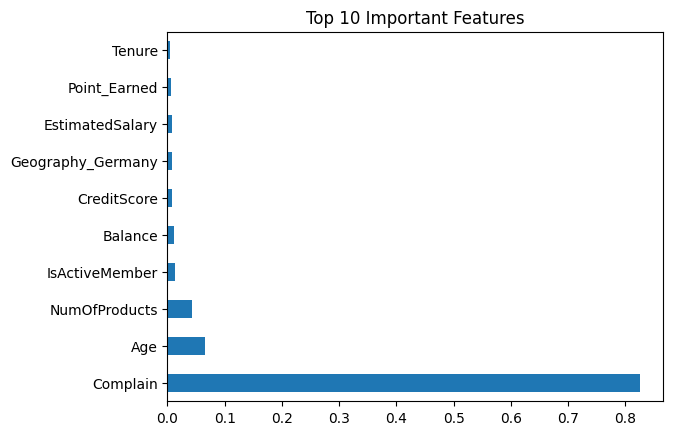

In [75]:
# Call feature after OneHotEncode
feature_names = np.concatenate([
    num_cols,
    clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)
])

importances = clf.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh', title='Top 10 Important Features')

Unit test the model before export.

In [81]:
# Get a sample of the original data
sample_data = df.sample(10, random_state=42)

# Separate features for prediction
sample_features = sample_data.drop('Exited', axis=1)

# Predict churn using the trained pipeline
sample_predictions = clf.predict(sample_features)

# Display the original 'Exited' status and the predictions
results = sample_data[['Exited']].copy()
results['Predicted_Exited'] = sample_predictions

print("Comparison of Actual vs. Predicted Churn:")
display(results)

Comparison of Actual vs. Predicted Churn:


,Exited,Predicted_Exited
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,1,1
6363,0,0
439,0,0


Export the model to do API

In [ ]:
joblib.dump(clf, "bank_churn_pipeline.pkl")
print("Model saved as bank_churn_pipeline.pkl")

Model saved as bank_churn_pipeline.pkl
